#  `✧ Open Source Zoltar ✧`

###### Brought to you by Mya Strayer, Claude, and you

*This project explores the intersection of intuition and probability by recreating tarot readings through computational simulation. I designed a dataset, virtual tarot reader, and simulation that mimics authentic shuffling techniques, card selection, and interpretive practices. I then repeated this simulation 10,000 times and verified the randomness of its readings. I incorporated Claude (a Large Language Model) as the "reader" to explore how machine interpretation compares to traditional human understanding. Feel free to edit.*

## `Introduction`
#### ✧ Where are we and how did we get here? ✧

Maybe you read Tarot, maybe you just like numbers, or maybe you're like me and dabble with a bit of both. The human brain is considered a *pattern-matching machine,* able to quickly take in information and determine meanings without conscious insight. Sometimes we see patterns that aren't really there, a phenomenon known as apophenia. This project explores the fascinating tension that exists somewhere between intuition and pattern-matching, using statistics to demystify divination and patterns to mystify the numbers.

I had a very simple goal in mind: Recreate a tarot reading. Does it feel weirdly impersonal because a machine did it? And if I recreated this simulation enough times, would probability theory hold? And, most importantly, would it matter to *you* if it does?

Statistically speaking, I'm choosing a base distribution (the 78 Tarot cards), shuffling, selecting a very small sample (n = 5), and evaluating convergence back to original distribution. Probability theory indicates that it will, but only after enough iterations.

**Hypothesis:**

Individual readings will feel meaningful despite aggregate distributions converging to randomness, demonstrating that subjective pattern-recognition persists independent of statistical reality.

## `Background`
#### ✧ Why *I* did what I did ✧

**The Tarot**

I chose the Tarot as my starting distibution for two reasons:

    1. **Cultural Relevance** — Tarot has experienced a recent resurgence amongst younger demographics as a meaning-making tool (`relevance`).
    2. **Computational Ease** — Tarot has well-established meanings and attributes (elements, astrologies, interpretations, etc.), allowing for mathematical tractability.

For this project, I wanted to recreate three aspects of a Tarot reading:
* Shuffling the 78 cards by taking out card blocks, potentially reversing them, and putting them back on the top or bottom of the deck.
* Splitting the deck into three roughly equal chunks and randomly choosing how to reorder them.
* Selecting the top five as part of a 'Five Card Spread': This is read as Past | Present | Subconscious | Guidance (considered 'Subconscious' in this simulation) | Future

**Cental Limit Theorem**

The CLT tells us that if we repeat a process enough times, patterns will emerge. While the individual readings might seem varied, over many readings the distributions should converge back to the starting distributions. For tarot, this would mean that something like the numerology of the cards (0-21) will stabilize into a normal distribution centered around the deck's mean (μ=8.3, σ=5.1).

**Claude as the Reader**

Real tarot readers might emphasize certain cards over others. To replicate this, I had Claude* assign a 'divine interpretation' for each card (matching either the Past, Present, Subconscious, or Future temporality of the five card spread), along with a score 0-5 indicating its confidence. These assignments highlight specific cards in the visualization and allow accuracy testing of the LLM's interpretation ability.

*Claude describes itself as a 'Large language model trained by Anthropic to be helpful, harmless, honest.'

## `Data`
#### ✧ What we're working with... ✧

In [1]:
# data pull
import pandas as pd

cards = pd.read_csv('tarot.csv')

# uncomment to see a snippet
#cards.head()

**Building the Original Dataset**

The data comes from me. Well, actually, it comes from Calmoura.com, the site I went to and manually transcribed for each of the 78 cards it's Numerology, Element, Astrology, Chakra, Upright and Reversed interpretations, as well as the Description for reference. I then assigned each card a valence (positive, neutral, or negative) based on its Upright/Reversed meanings, creating a numerical framework (-1, 0, 1) for tracking reading interpretations.

**Accounting for Reader Bias**

Pascal Boyer's theory of "ostensive detachment" [1] suggests that people trust in a tarot reader because they believe they speak *for* divination rather than themselves. Meaning that the presence of the reader might itself have an impact on how a reading is interpreted.

To maintain a fully computational setting (and keep with the theme), I used Claude to assign a `Temporality` tag based on the card's thematic associations. For example, the Hermit might suggest introspection (`Subconscious`), wheras the Tower represents sudden change (`Future`). Similar to how a human reader might indicate to take a card more seriously, I'll use this in the display to 'light up' certain cards. Additionally, Claude assigned a `Confidence` value (0-5) for each classification, which I'll use to appropriately weight or penalize the accuracy score. Full conversation available in repository.

**Summary Statistics**

Okay, but what's actually *in* the data? Statistical methods are going to work better for numerical values, so we'll use numerology as our base comparison for normalization. The starting deck has values that range from zero to twenty-one,  most being between one and fourteen, others *only* in the Major Arcana. The mean value (μ) is 8.3, and the standard deviation (an estimate of the spread, σ) is 5.1.

The other main variable this project is interested in is the spread of the elements. There are 21 `Fire` cards, 20 `Air` cards, 19 `Earth` cards, and 18 `Water` cards in the original deck. Fire cards have a slightly higher mean numerology comparatively (1.22 addition to next highest mean, being Water), whereas Air has the lowest at 7.6 (likely due to the inclusion of The Fool-- the only card with a 0 numerology).

Claude's confidence averaged 3.8 (ranging between 2-5), varying slightly by element; a difference of only 0.2 between the most (`Fire`) and least (`Earth`) confident groups. Within the deck, the most common zodiac signs are `Sagitarrius` (9), `Leo` (8), and `Libra` (8), with the other zodiacs having either six or seven matches (there are also some connected to a planet such as Pluto rather than a zodiac, those all have a count of one). 

## `Virtual Tarot Reader`
#### ✧ aka Open Source Zoltar aka def stat_tarot ✧

A realistic tarot reading can't just be `random.shuffle()`! In order to best recreate the 'feel' of a tarot reading, I designed the following functions (see tarot.py):


`block_shuffle`:
* Removes blocks (14-42 cards) from the deck with a random chance (p = 0.222) of reversing them and replaces them at random at the beginning or end of the deck. Does this 17-42 times, unique per run. After shuffling, cards are assigned with their final orientation interpretation (Upright or Reversed), deck is split roughly into thirds and reordered at random.


`calculate_valence`:
* Helper function for `block_shuffle`. Transforms the `valence` of the reading into a numerical scale. A more negative interpretation is encoded as -1, a neutral one 0, and a positive one 1. Used for aggregate scoring.


`tarot_reading`:
* Draws top five cards from the deck and assigns each with the expected temporality (Past, Present, Subconscious, Subconscious, Future). Encodes the `Alignment` as 1 (a success) if the expected Temporality matches Claude's assignment, 0 otherwise. Then adds an error adjustment proportional to the stated confidence of the assignment.
 
Run the next cell to display a reading ✧ ﾟ.

In [2]:
# imports done in this style to indicate the associated file
from tarot import read_the_cards

# display a reading
your_reading = read_the_cards(show_description=True) #change to True if interested

*$*^$**(^%$*&(_^$^*&(_^$**^*@^*@*-* YOUR READING *$^%$*&($$*&(_^$**^*@^%$*&(_^&(_^$**^*@*-* 

 Nine of Pentacles, Knight of Swords, The Hanged Man, The High Priestess, Page of Wands 
 _______________   _______________   _______________   _______________   _______________
|               |  |               |  |               |  |               |  |               |
|NINE of PENTACL|  |KNIGHT of SWORD|  |HANGED MAN     |  |HIGH PRIESTESS |  | PAGE of WANDS |
| ⬟ ⬟ ⬟ ⬟ ⬟    |  |       †       |  |     XII       |  |      II       |  |      |        |
|   ⬟ ⬟ ⬟      |  |      \o →     |  |   _____       |  |   ☽  ☉  ☾    |  |     o/        |
|     \o/🦅      |  |    ---|\---   |  |   |   |       |  |      ♀        |  |    /|         |
|      |        |  |    ┌─┐/ \     |  |   |  o/       |  |     /|\       |  |    / \        |
|     / \       |  |     ⚔⚔       |  |   | /|        |  |    / | \      |  |     ♣♣        |
|_______________|  |_______________|  |_______________|  |_______________|

#### ✧ What are you looking at? ✧


**Special Characters Color**

The color of the special character headers (`@^*@*-**$^`) represent the ending *average valence* of the reading. If it's more positive, the characters will be gold; blue if it's interpretation is more negative, or grey if it's perfectly balanced. If when you run this it's grey, that's pretty rare! There's only a 2% chance that'll happen (based on the simulation).


**Highlighted Cards and Temporalities**

Did anything light up yellow? (If not, try running the cell again!) Cards that are read in their 'divine temporality,' or rather that match the one that Claude assigned, will have their card and temporality lit up. This draws attention to visually meaningful placements. Does their interpretation seem more meaningful to you? How much do you believe in Claude's ability to understand abstract concepts?


**Optional Descriptions**

Want to know more about the cards themselves? Change the argument to True to output their descriptions (unchanged by the orientation of the card). You can use this to either learn more about the cards or to investigate valence / temporality assignments.


## `Simulation Station`
#### ✧ If we throw *enough* spaghetti at the wall... ✧


Statistics generalizes large datasets. Since the original deck only has 78 cards and a reading only five, these aren't truly large *enough* sample sizes to explore how distributions normalize. But what happens when I run 10,000 readings, selecting only the first five cards?


**CLT Gut-Check**

Let me reiterate, statistics are numerical methods-- they work best on numbers! To start with something simple, let's look at the average numerology distribution of the 10,000 readings. As a reminder, the underlying distribution (the deck) has a mean value of 8.3 and a standard deviation of 5.1. The standard deviation is dependent on the sample size, so we should expect that this value will be smaller but the mean should be relatively unchanged.

Mean Numerology Value Standard Deviation
               8.2354             2.1950


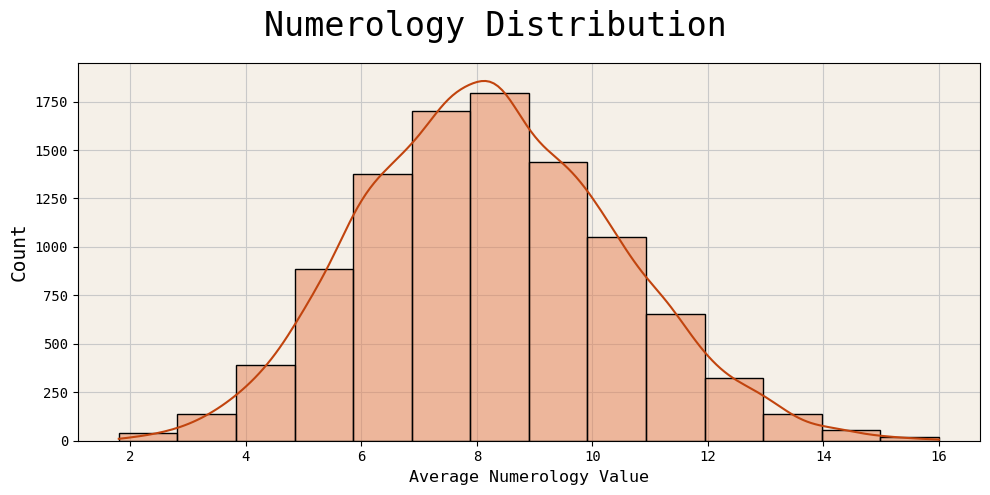

In [3]:
from visualizations import figure_one
from tables import fig1_stats

fig1_stats()
figure_one();

The CLT in action! The average numerology value has indeed converged into a normal distribution centered around the true mean*. And, as expected, the standard deviation is much smaller. Unfortunately, I don't have the time (nor desire) to run 100,000 simulations, but we'd also expect that an even larger sample size would create a proportionately tighter distribution.

**Nerd-out moment: The *binwidth* of this graph is incredibly important! Because I'm looking at the average value from a group of five, there's only so many values I can get (I would never get 2.3, for example). This can cause something called discretization artifacts if the binwdith is not set appropriately, causing the plot to display *strange* peaks that aren't actually meaningful.*

The above plot is great, but it doesn't really show *how* the trend deviates from sample to sample. Does it oscillate randomly or move in waves? And people aren't very likely to perform and remember *10,000* readings, so how might this change when investigating a much smaller subset? The below plots show exactly that, with a much smaller random subset compared directly to a larger one (with the interquartile range super-imposed, where roughly 50% of the data should fall).

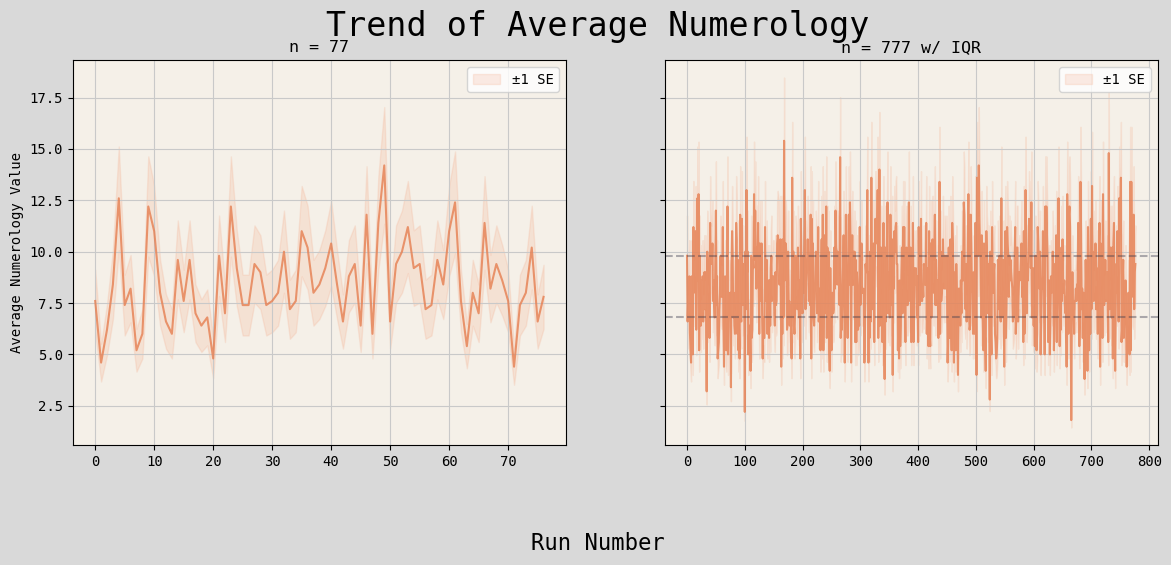

In [4]:
from visualizations import figure_two

figure_two();

From the above visualizations, we can see how in smaller subsets the trend is much more *volatile* but still appears to oscillate randomly. In even larger subsets, it becomes more apparent that the values are ranging between three and fourteen with most points being between five and eleven. This matches exactly what was seen in the histogram, and tells us that the cards are very truly being drawn *at random*.

**It meant something to me!**

But just because they're being drawn at random doesn't mean you might not have found meaning in your tarot reading. After all, I did design it so that a sense of meaning was still present. The `valence` variable was intended to track the overall interpretation of the reading, either more positive or negative. After running the 10,000 simulations, how did this change? And again, let's compare with a zoomed-in with a smaller subset to really see the trend.

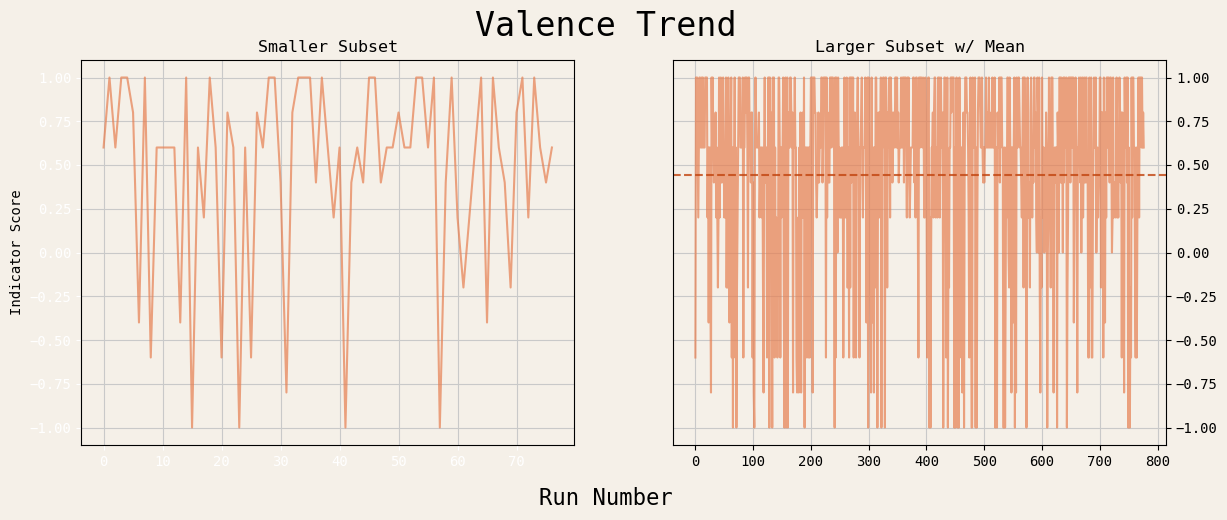

In [5]:
from visualizations import figure_three

figure_three();

Overall, readings are more likely to be positive as the average valence across the 10,000 repetitions is 0.47 (it's more likely that your reading had gold characters). This is very close, however, to the average value you'd get from one individual reading (seen in the below table, be sure to run again to see how the reading value will change). Why is that? Very likely because the majority of the cards (n = 63, 80% of total) have a more positive interpretation in the `Upright` position and there was a very low probability ($p=0.22$) of the cards reversing themselves in the simulation. If more cards are likely to be read as positive upright and it's more likely for them to be read upright, it makes sense that our average `valence` would be positive.

But it's important to note how *impactful* the negative readings are. Unlike the numerology trend, these values are skewed positive but have a heavier tail (visual pull) in the negative direction. In practice, this might make a negative reading feel more impactful as it is a stronger deviation from the norm. However, it's important to remember something about the way the cards were shuffled: they were taken out in blocks of 14-42 and it was decided *at that level* if they were to become reversed. This means that it's more likely for *all or most* of the cards in a reading to be reversed rather than just one or two, which would make it any blue-colored reading would have a `valence` score very close to -1.

In [6]:
from tables import fig3_stats

# rerun this cell
fig3_stats()

Simulation Avg Reading Avg
        0.4721      0.2000


**Can Claude read?**

Alright, so the numbers seem normal and my simulation's results tell you more about itself than it does the magic of tarot. But what about Claude? How well did it do at correctly assigning a card to an interpretation it found best-suited it? There was two ways I measured this: *objectively,* where I simply measured the proportion of matching alignments, and *subjectively,* where I allowed Claude's stated confidence to either boost or deflate the score accordingly. Since I have enough data, I can look at the *convergence rate,* or how long it takes the mean to stabilize, of these accuracy rates. From the below plot, we can see that the objective rate stabilizes around 0.23 after about 2000 runs, and the adjusted rate converges to 0.32 shortly after.

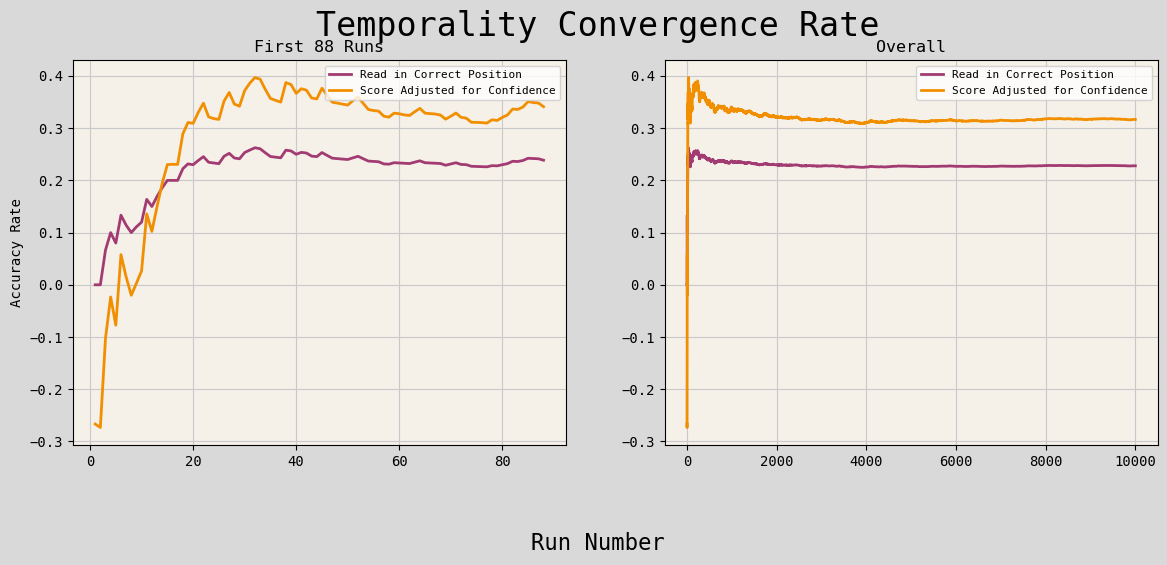

In [7]:
from visualizations import figure_four

figure_four();

Something that you can't see in the overall view is how *volatile* these rates are in the beginning, especially the adjusted one. In the first few runs, Claude's high confidence ($\mu=3.83$) caused a lower accuracy rate but eventually led to an overall increase. Is this significant? Statistically, yeah, there's a large enough difference in these scores relative to their sample size, but meaningfully? You tell me.

## The `Human-In-The-Loop` Approach
#### ✧ What do you gotta do with this? ✧

In [8]:
# run once - starts history
reading_history = pd.DataFrame(columns=['Index', 'Name', 'Element', 'Suit', 'Numerology', 
                                        'Temporality', 'Valence', 'Reading'])
reading_index = 0

Okay, here's the part where I'm hoping you've cloned this repo and are running this on your local machine. Nothing in my simulation accounted for how *your own* interpretation of the cards might change over a repeated number of readings. To recreate this, I've created a `reading_index` variable that counts how many times you run the following cell. During each run, it will read the cards, update the reading history, and print out the total number of runs, along with the total number of cards pulled and the mean numerology value. As you run this cell, you'll notice that the mean numerology value of your cards will get closer and closer to its mean.

In [120]:
from tables import fig5_stats

reading = read_the_cards()

# rerun the calculation
reading_history, mean_numerology = fig5_stats(reading, reading_history, reading_index)

# adding to your reading history
reading_index += 1

print(f"Reading #{reading_index} added. Total cards in history: {len(reading_history)}")
print(f"Aggregate Mean Numerology: {mean_numerology:.2f}")

*$*^$**(^%$*&(_^$^*&(_^$**^*@^*@*-* YOUR READING *$^%$*&($$*&(_^$**^*@^%$*&(_^&(_^$**^*@*-* 

        The Fool, Nine of Wands, King of Wands, Four of Pentacles, Three of Cups        
 _______________   _______________   _______________   _______________   _______________
|               |  |               |  |               |  |               |  |               |
|   THE FOOL    |  |NINE of WANDS  |  | KING of WANDS |  |FOUR of PENTACL|  |THREE of CUPS  |
|      0        |  |    o | | | |  |  |     ♚|        |  |      ⬟        |  |  o   o   o    |
|               |  |   /| | | | |  |  |     \o/       |  |     \(o)/     |  | /|\ /|\ /|\   |
|    o/        |  |   /| | | | |  |  |    ==|==      |  |    ⬟ | ⬟      |  |╱╲ | ╱╲ | ╱╲  |
|    /|   ☼    |  |  ♣♣♣♣♣♣♣♣♣♣   |  |     / \       |  |      |        |  |\_/ | \_/ \_/  |
|    / \       |  |_______________|  |      ♣♣       |  |      ⬟        |  |_______________|
|   ~cliff~    |                   |_______________|  |_______________|   

Do you remember way back when I was describing the dataset, I mentioned the distribution of the elements and astrologies? Maybe yours look totally different from the original deck's! After running the above cell as many times to your liking, rerun the following cell to see how your elemental distribution compares to the original deck and a WordCloud of the most common astrologies. As you add more points to your reading history, you should expect that the two elemental distributions will mimic one another and that Sagittarius, Leo, and Libra will be the largest words in the WordCloud.

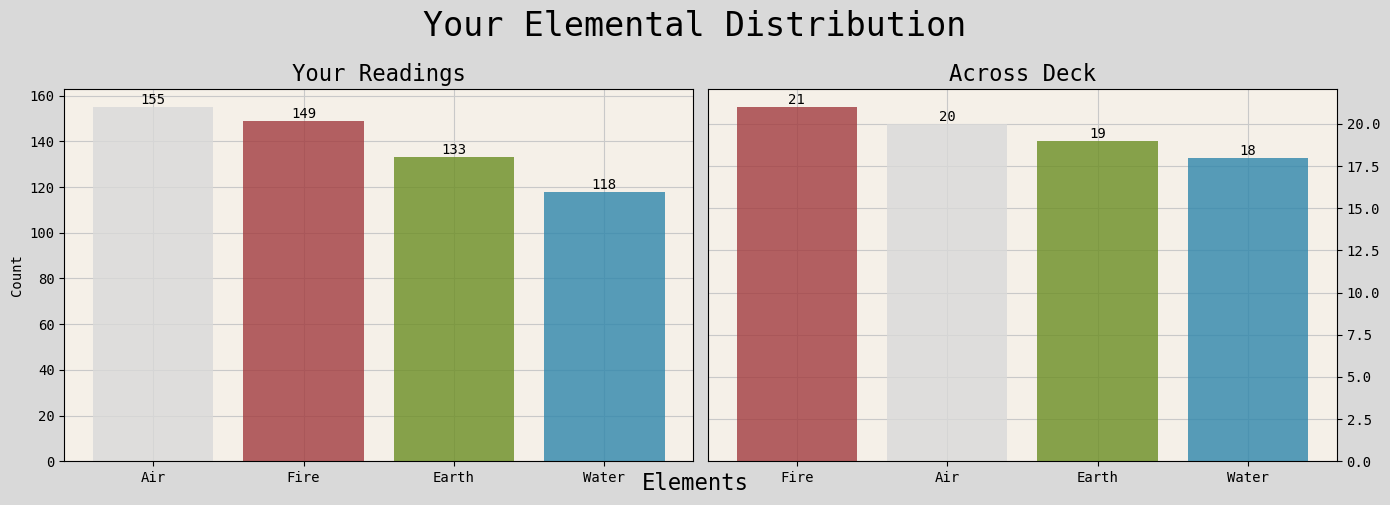

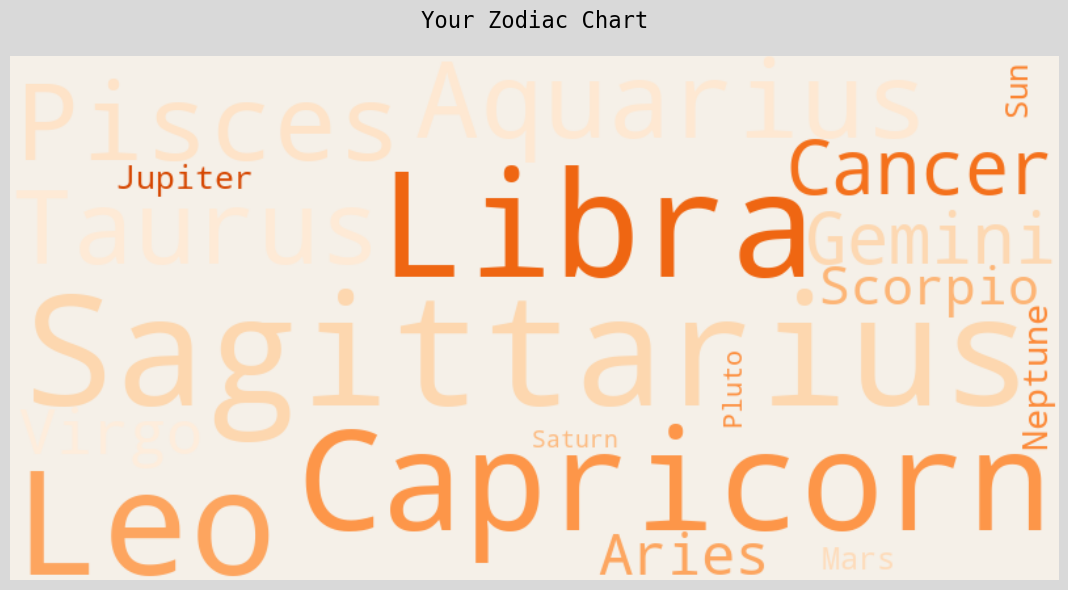

In [121]:
from visualizations import figure_five, figure_six

figure_five(reading_history);
figure_six(reading_history);

 This is where you come in ✧ ﾟ.